# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print("Shriya Iyer")

Shriya Iyer


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")


I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [3]:
# Write your answer here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [46]:
# Write your own code

fifa23 = pd.read_csv("data_quiz/fifa23_players_basic.csv")

<font size = "5">

(a) Use queries + global variables

<font size = "3">

- Subset the players whose value of the column "On Loan" is "YES" <br>
and store it in a new dataset
- How many players are on loan?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. <br>
Reference the column as ``` `On Loan` ``` inside .query()

In [48]:
# Write your own code

fifa23_players = fifa23.query("`On Loan` == 'YES'")

print(len(fifa23_players))

print("There are " + str(len(fifa23_players)) + " players on loan.")


1229
There are 1229 players on loan.


<font size = "5">

(b) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "Overall"
- If "Overall > 90", classification = "Top Performer"
- If "Overall <= 90", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [62]:
# Write your own code

def fnplayer_classification(Overall):
    if "Overall >90":
        classification = "Top Performer"
    elif "Overall <= 90": 
        classification = "Non Top-Performer"
    return classification

player_classification = fifa23["Overall"].apply(fnplayer_classification)



<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

The varable "Joined On" shows the date in which each player joined FIFA
- Use ".sort_values()" to order the "Joined On" column <br>
from earlier data to later date
- Get a subset with the 6 players in the dataset <br>
who joined FIFA earliest
- From this subset, display the year in which they joined <br>
by displaying the column "Joined On"

In [63]:
# Write your own code

fifa23_joinedon = fifa23.sort_values(by = "Joined On", ascending = True)

fifa23_earliest = fifa23_joinedon.iloc[:6]

print(fifa23_earliest["Joined On"])



8586     2002
10877    2003
4324     2004
11056    2005
10360    2005
11768    2005
Name: Joined On, dtype: int64


<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Potential" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [64]:
# Write your own code

y = fifa23["Potential"]
x = fifa23["Age"]

linreg = smf.ols(formula = 'y ~  x', data = fifa23)
linreg_results = linreg.fit()

linreg_list = linreg_results.params
print(linreg_list)

#Answer
b0 = 79.752454
b1 = -0.346103



Intercept    79.752454
x            -0.346103
dtype: float64


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.5```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.5```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [72]:
# Write your own code

n = len(fifa23)

random_var = np.random.uniform(0, 1, size=n)

data0 = fifa23.query('@random_var < 0.5')
data1 = fifa23.query('@random_var >= 0.5')


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1" using <br>
```plt.hist()```
- You will need to label the axes, and the title
- To get full points, plot the histograms with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" vector instead of ```...``` <br>
(The alpha option sets the transparency of the histogram )

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

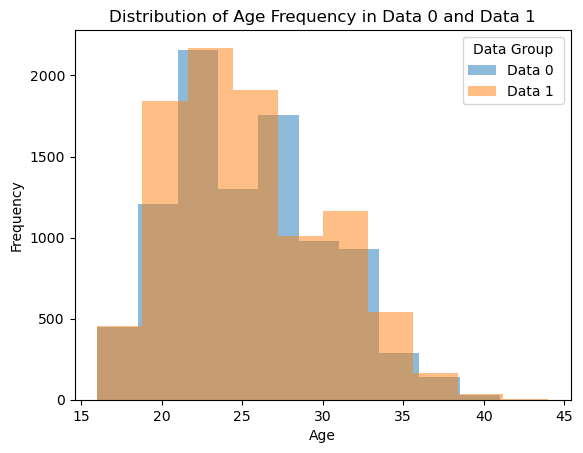

In [73]:
# Write your own code

data_combined = [data0, data1]
data_names = ["Data 0 ", "Data 1"]

for data in data_combined:
    plt.hist(x = data["Age"], alpha = 0.5)

# Add labels and a legends
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(labels = data_names, title="Data Group")
plt.title("Distribution of Age Frequency in Data 0 and Data 1")
plt.show()